In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
os.getcwd()

'C:\\Users\\Shimul\\Documents\\Building CSE 4000 Thesis'

## Dataset path location using glob

In [9]:
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')


In [14]:
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))

Building house data :  53
Mosque data:  37
Temple data:  68
Tinshed data:  26


In [69]:
dataset_classes=[building_house,mosque,temple,tinshed]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  4


## Make dataset and labels using keras.preprocessing.image

In [16]:
from tensorflow.keras.preprocessing import image

In [17]:
data=[]
labels=[]

In [20]:
# Building house
for i in building_house:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(0)

In [22]:
#mosque
for i in mosque:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(1)

In [23]:
#temple
for i in temple:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(2)

In [24]:
#tinshed
for i in building_house:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(3)

In [29]:
print('Total data: ',len(data))
print('Labels of data: ',len(labels))

Total data:  211
Labels of data:  211


In [32]:
print('Data type: ',type(data))
print('Labels type: ',type(labels))

Data type:  <class 'list'>
Labels type:  <class 'list'>


## Convert the list into numpy array

In [34]:
data_array=np.array(data)
labels_array=np.array(labels)

In [36]:
print('Data type: ',type(data_array))
print('Labels type: ',type(labels_array))

Data type:  <class 'numpy.ndarray'>
Labels type:  <class 'numpy.ndarray'>


## Data split using sklearn train_test_split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test =train_test_split(data_array,labels_array,test_size=0.2,random_state=42)

In [43]:
print('x train shape: ',x_train.shape)
print('x test shape: ',x_test.shape)
print('y train shape: ',y_train.shape)
print('y test shape: ',y_test.shape)

x train shape:  (168, 500, 500, 3)
x test shape:  (43, 500, 500, 3)
y train shape:  (168,)
y test shape:  (43,)


## plot random image and label
if range(0,255) ->  int then plt.imshow(img)

range(0.0,255.0) ->float scale the image into (0,1) by dividing 255 then plt.imshow()

In [62]:
random_image=x_train[0]
random_image_labels=y_train[0]
print('image shape: ',random_image.shape)
print('Data types of image is : ',random_image.dtype)
print('image output label: ',random_image_labels)

image shape:  (500, 500, 3)
Data types of image is :  float32
image output label:  2


Label:  2


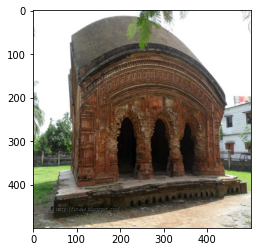

In [63]:
print('Label: ',random_image_labels)
plt.imshow(random_image/255)
plt.show()

## Normalize the data for training
x_test -> [0,1]


In [102]:
print('Data range is [0,255]: ',x_train[0][0][0])

Data range is [0,255]:  [255. 255. 255.]


In [103]:
x_test_normalize=x_test/255
x_train_normalize=x_train/255

In [105]:
print('Data range is [0,1]: ',x_train_normalize[0][0][0])

Data range is [0,1]:  [1. 1. 1.]


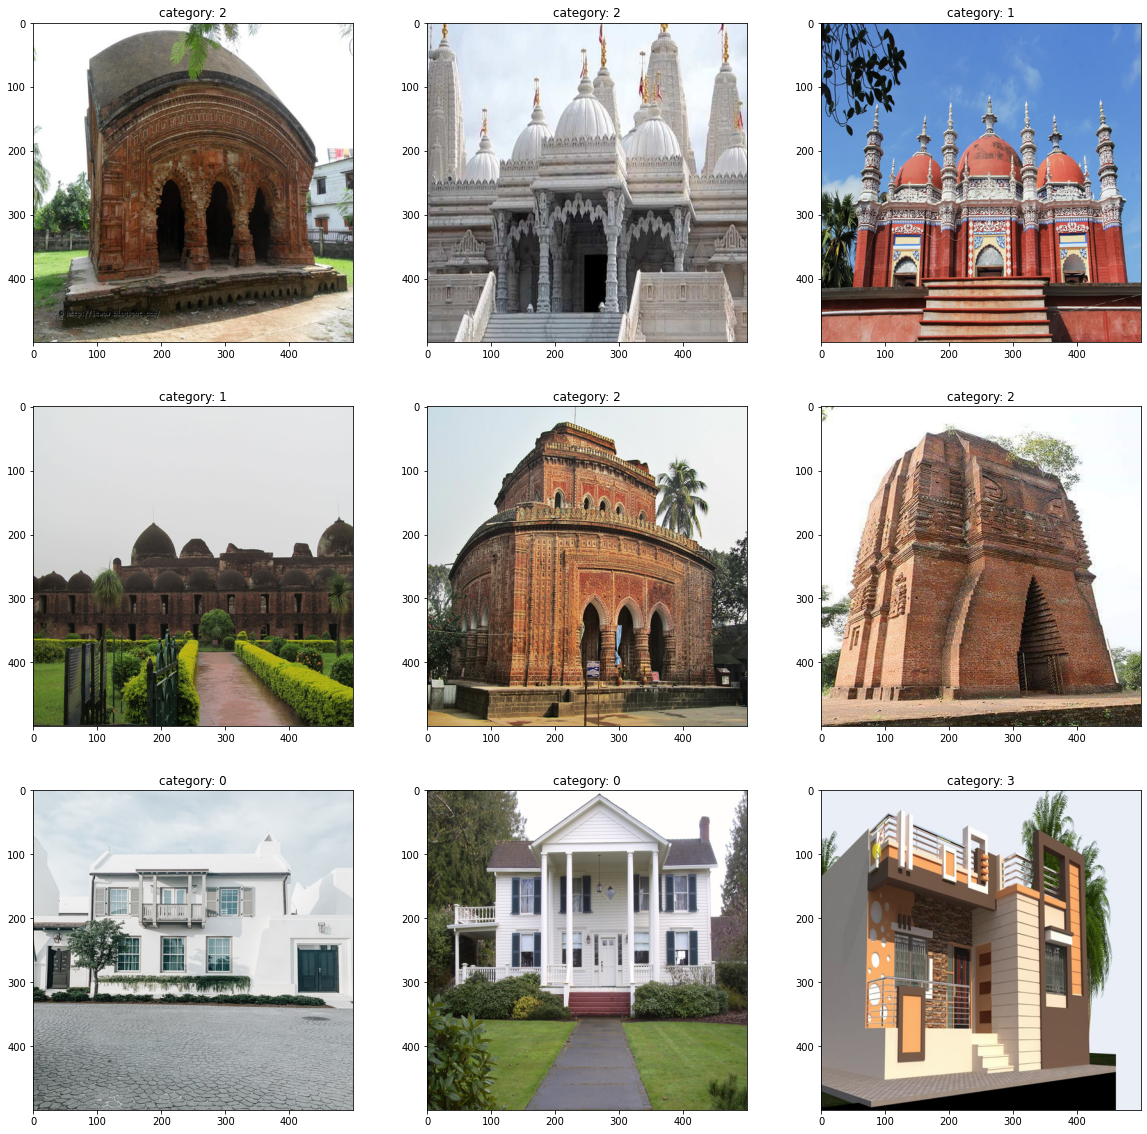

In [123]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train_normalize[i])
    plt.title('category: '+str(y_train[i]))
plt.show()

## Categorial the labels using one hot encoding Keras

In [90]:
from tensorflow.keras.utils import to_categorical


In [128]:
print('Non categorical values : ',y_test[:10])

Non categorical values :  [0 3 2 1 1 3 0 3 0 2]


### categorical y_test and y_train

In [129]:
y_test_categorical=to_categorical(y_test)
y_train_categorical=to_categorical(y_train)

In [132]:
print('Categorical values : \n',y_test_categorical[:10])

Categorical values : 
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]



## Define model architecture
### CNN requires x_test norlalize values [0,1] and y_test categorical values [0. 0. 1. 0.]

In [67]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

In [70]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(500,500,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(total_class,activation='softmax'))

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 500, 500, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 250, 250, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 250, 250, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 256)      

In [89]:
model.layers

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Compile the model using loss and optimizer

In [135]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

## Train the model and save the model suing call backs fucntion

In [144]:
import tensorflow

In [145]:
tensorflow.config.run_functions_eagerly(True)

In [137]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [140]:
checkpointer.filepath

'building.model.best.hdf5'

In [146]:
history=model.fit(x_test_normalize,y_test_categorical,epochs=10,batch_size=32,steps_per_epoch=3,callbacks=[checkpointer])

C:\Users\Shimul\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/10
3/3 [==============================] - 31s 10s/step - loss: 1.4015 - accuracy: 0.3200
Epoch 2/10
3/3 [==============================] - 16s 5s/step - loss: 1.3295 - accuracy: 0.3519
Epoch 3/10
3/3 [==============================] - 15s 5s/step - loss: 1.3051 - accuracy: 0.3733
Epoch 4/10
3/3 [==============================] - 15s 5s/step - loss: 1.3208 - accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 16s 5s/step - loss: 1.2995 - accuracy: 0.4400
Epoch 6/10
3/3 [==============================] - 15s 5s/step - loss: 1.3015 - accuracy: 0.3519
Epoch 7/10
2/3 [===================>..........] - 5s 2s/step - loss: 1.2396 - accuracy: 0.5581


## Testing data using test set

In [148]:
score=model.evaluate(x_test_normalize,y_test_categorical)
score

C:\Users\Shimul\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


2/2 [==============================] - 1s 533ms/step - loss: 1.2399 - accuracy: 0.4651


[1.2398513555526733, 0.4651162922382355]

In [150]:
print('Accuracy of the model is : ',score[1]*100)

Accuracy of the model is :  46.51162922382355


## plot accuracy and loss graph

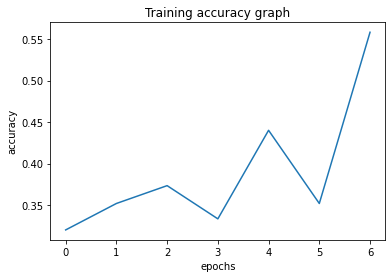

In [152]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'])

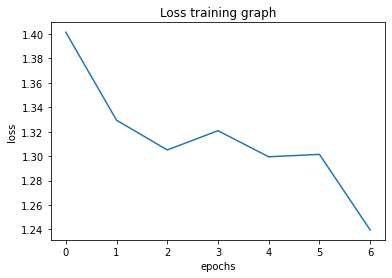

In [153]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'])